In [5]:
import torch
import torch.nn as nn
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,),(1,))
])
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

tensor([8, 2, 3, 9, 8, 5, 2, 6, 7, 2, 7, 8, 3, 0, 6, 2, 8, 7, 6, 3, 1, 7, 5, 7,
        1, 0, 6, 3, 6, 0, 4, 2, 8, 8, 1, 8, 8, 0, 5, 2, 8, 7, 8, 9, 5, 5, 2, 3,
        9, 3, 0, 2, 8, 1, 9, 1, 3, 7, 5, 1, 8, 5, 1, 7])


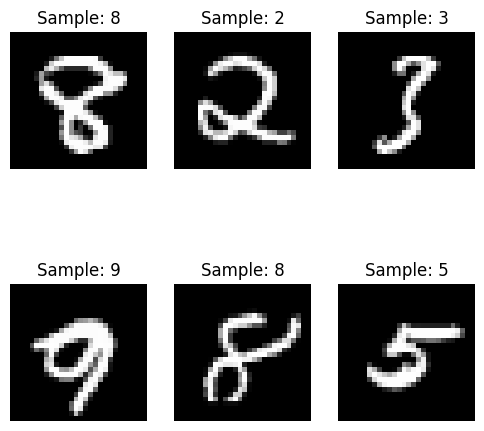

In [ ]:
images, labels = next(iter(train_loader))

plt.figure(figsize=(6, 6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"Sample: {labels[i].item()}")
    plt.axis("off")

plt.show()

In [ ]:
input_size = 784
hidden_size = 16
output_size = 10

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_forward = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        output = self.linear_relu_forward(x)
        return output

model = NeuralNetwork()
logits = model(images)
prediction = nn.Softmax(dim=1)(logits)
